# Regression with Hundred Hammers

In this notebook we will explain how to use the HundredHammers library to perfom a basic model selection and hyperparameter optimization for a classification problem. 

To do this, we will use one of the example datasets available in the scikit-learn library.

In [1]:
import logging

import hundred_hammers as hh
from hundred_hammers.model_zoo import (
    DummyRegressor,
    Ridge,
    DecisionTreeRegressor,
    KNeighborsRegressor
)

from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

First we store the data in the X (input) and y (target) variables.

In [2]:
data = load_diabetes()
X = data.data
y = data.target

We are going to first train some models with their default configuration. If you don't specify the models that you want to use, some regression models will be chosen for you.

To see which models are chosen by default, you can check the ```DEFAULT_REGRESSION_MODELS``` variable

In [3]:
hh.model_zoo.DEFAULT_REGRESSION_MODELS

[('Dummy Mean', DummyRegressor(), {}),
 ('Dummy Median', DummyRegressor(strategy='median'), {}),
 ('Linear Regression', LinearRegression(), {}),
 ('Decision Tree', DecisionTreeRegressor(), {}),
 ('SVR', SVR(), {}),
 ('Linear SVR', LinearSVR(dual='auto'), {}),
 ('Ridge', Ridge(), {}),
 ('Passive Aggressive', PassiveAggressiveRegressor(), {}),
 ('KNN', KNeighborsRegressor(), {}),
 ('Neural Network Regressor', MLPRegressor(), {}),
 ('Gaussian Process', GaussianProcessRegressor(), {}),
 ('Random Forest', RandomForestRegressor(), {}),
 ('AdaBoost', AdaBoostRegressor(), {}),
 ('Gradient Boosting', GradientBoostingRegressor(), {})]

Notice that it is composed of a list of tuples. Each tuple contains the name we give to the regressors, an instance of the class that implements the regression model and a grid of hyperparameters (which now is empty, but will be explained later).

Those are the models that we are going to use now.

## Evaluation with default models

First create the HundredHammersRegressor object

In [4]:
hh_models = hh.HundredHammersRegressor(show_progress_bar=True)

Then evaluate the models. Apart from the actual data (the variables X and y), you can pass other parameters. ```optim_hyper``` checks whether we want to optimize the hyperparameters of the models and n_grid_points controls how many values from each hyperparameter to check in the optimization.

Since we don't want to optimize the hyperparameters, optim_hyper will stay as false.

In [5]:
# configure the logger
hh.hh_logger.setLevel(logging.WARNING)

# Evaluate the models and store the results in a variable
df_results = hh_models.evaluate(X, y, optim_hyper=False)

Output()

Notice the line above the evaluation of the models. This configures the logger to only show warnings (of which there should be none). The setting you most likely would want to use in an interactive enviroment would be ```logging.INFO```, since you get information about each model in "real time". 

If you want to see more detailed information, you can set the level to ```logging.DEBUG```. It outputs a lot of information, but it might be useful if you encounter a bug.

For the purposes of this notebook, it will be kept to ```logging.WARNING``` but you are welcome to change it if you are running this notebook locally.

We can now show the results of our execution

In [6]:
df_results

,Model,Avg R2 (Validation Train),Std R2 (Validation Train),Avg R2 (Validation Test),Std R2 (Validation Test),Avg R2 (Train),Std R2 (Train),Avg R2 (Test),Std R2 (Test),Avg MSE (Validation Train),...,Avg MSE (Test),Std MSE (Test),Avg MAE (Validation Train),Std MAE (Validation Train),Avg MAE (Validation Test),Std MAE (Validation Test),Avg MAE (Train),Std MAE (Train),Avg MAE (Test),Std MAE (Test)
0,Dummy Mean,-2.519875e+30,3.514710e+30,-2.822621e+30,2.824018e+30,-5.967960e+30,2.985876e+30,-5.503870e+30,2.783961e+30,6025.346185,...,5543.920755,345.586100,66.528664,1.285090,66.771853,3.954009,66.558512,0.611533,62.673769,2.125386
1,Dummy Median,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6191.786919,...,5699.860674,465.699478,65.760775,1.301326,66.204519,4.687216,65.805666,0.633209,62.130337,2.505957
2,Linear Regression,1.137202e-01,7.159141e-02,5.182292e-03,2.447789e-01,1.020584e-01,5.316907e-02,-2.025532e-02,2.018161e-01,2825.154231,...,2971.440123,277.193106,43.152654,1.058094,45.040178,3.564860,43.361235,0.521967,43.299951,2.166028
3,Decision Tree,1.000000e+00,0.000000e+00,-5.783657e-02,2.062667e-01,1.000000e+00,0.000000e+00,-1.882994e-01,2.532074e-01,0.000000,...,6520.450562,1118.671238,0.000000,0.000000,61.913940,5.179524,0.000000,0.000000,64.347191,5.943709
4,SVR,-4.066517e+01,5.294339e+00,-4.549019e+01,9.812883e+00,-2.726077e+01,2.052158e+00,-2.839409e+01,3.224482e+00,5109.505251,...,4694.869671,386.060989,59.504434,1.283069,60.565602,4.503820,58.497219,0.708232,56.013517,2.785097
5,Linear SVR,-8.088446e+03,9.438323e+02,-8.524857e+03,2.397968e+03,-4.128620e+03,2.261261e+02,-4.088278e+03,5.591811e+02,8867.680507,...,7793.133383,846.730136,72.256678,1.761600,72.438761,7.095314,70.408730,0.918303,68.178079,4.292229
6,Ridge,-1.958291e+00,2.865614e-01,-2.175961e+00,7.223069e-01,-1.489825e+00,1.686184e-01,-1.575947e+00,4.395648e-01,3476.386594,...,3216.736691,240.890618,49.781200,1.081382,50.518662,3.929551,48.836550,0.625379,46.558648,2.240665
7,Passive Aggressive,-3.937706e-01,2.225557e-01,-5.133981e-01,3.701056e-01,-2.242080e-01,1.357885e-01,-3.294964e-01,2.514567e-01,3143.425889,...,3058.255903,252.938792,45.953154,1.440233,47.238246,3.918072,45.306031,0.831925,44.265377,2.281619
8,KNN,2.164743e-01,8.817877e-02,-2.953519e-01,3.156287e-01,2.416326e-01,6.218724e-02,-2.616724e-01,2.260855e-01,2424.237313,...,3701.019640,451.648246,38.772335,1.360024,47.998223,4.055843,38.161416,0.821798,46.440674,3.163698
9,Neural Network Regressor,-2.366673e+03,7.224186e+02,-2.491076e+03,9.559171e+02,-2.075089e+03,5.749243e+02,-2.134659e+03,7.107565e+02,24097.251455,...,23572.577659,2003.049606,135.499782,2.847086,135.557419,8.580042,135.435577,1.885763,135.360543,6.772771


That's an ok way of displaying the result, but tables can sometimes be hard to read, this is why we also implement a couple of functions to display the information of the table in a more readable format.

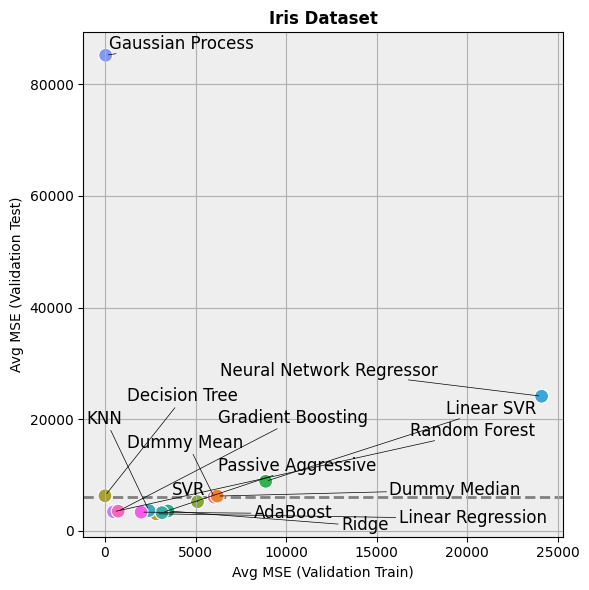

In [7]:
hh.plot_batch_results(df_results, metric_name="MSE", title="Iris Dataset", display=False)

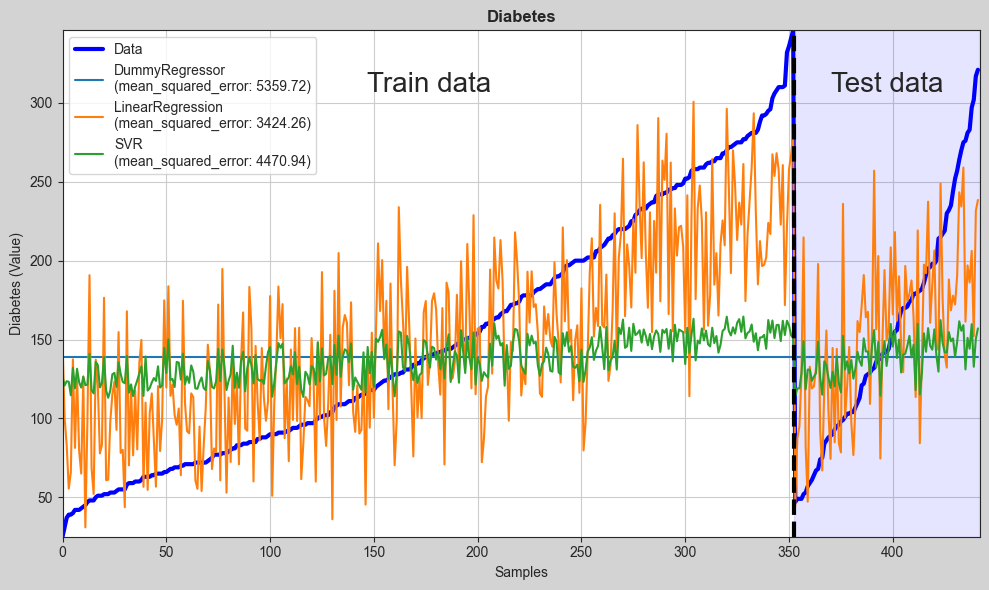

In [8]:
# Take the models in positions 1, 2, 3 and 5
models = [i for _, i, _ in hh_models.trained_models[1:3] + hh_models.trained_models[4:5]]

# Plot the predictions
hh.plot_regression_pred(X, y, models=models, metric=mean_squared_error,
                         title="Diabetes", y_label="Diabetes (Value)")

In case we needed to use one of the trained models, we can take it from the ```trained_models``` attribute from the ```HundredHammersRegressor``` class. This value will consist on a list with tuples containing the name of the model and the trained model.

In [9]:
hh_models.trained_models

[('Dummy Mean', DummyRegressor(), {}),
 ('Dummy Median', DummyRegressor(strategy='median'), {}),
 ('Linear Regression', LinearRegression(), {}),
 ('Decision Tree', DecisionTreeRegressor(random_state=9), {}),
 ('SVR', SVR(), {}),
 ('Linear SVR', LinearSVR(dual='auto', random_state=9), {}),
 ('Ridge', Ridge(random_state=9), {}),
 ('Passive Aggressive', PassiveAggressiveRegressor(random_state=9), {}),
 ('KNN', KNeighborsRegressor(), {}),
 ('Neural Network Regressor', MLPRegressor(random_state=9), {}),
 ('Gaussian Process', GaussianProcessRegressor(random_state=9), {}),
 ('Random Forest', RandomForestRegressor(random_state=9), {}),
 ('AdaBoost', AdaBoostRegressor(random_state=9), {}),
 ('Gradient Boosting', GradientBoostingRegressor(random_state=9), {})]

## Automatic optimization of hyperparameters

In case we want to choose the models we want to evaluate, we must indicate them to the ```HundredHammersRegressor``` class.

For this example, we will use four simple regression models.

In [10]:
models_to_check = [
    ("Dummy", DummyRegressor(), None),
    ("Ridge", Ridge(random_state=0), None),
    ("Decision Tree", DecisionTreeRegressor(random_state=0), None),
    ("KNN", KNeighborsRegressor(), None)
]

Each model has a name and an object that implements it. The third position in the tuple represents the user-specified grid of hyperparameters, however, we will let them be automatically generated.

This will only happen for already configured models, if you want automatic generation of hyperparameters for a model that is not already added, check the "example_add_model.ipynb" notebook.

We can now proceed passing these models to the ```HundredHammersRegressor``` class.

In [11]:
hh_models = hh.HundredHammersRegressor(models=models_to_check, show_progress_bar=True)

This time, since we want to optimize the hyperparameters of our models, we set the appropriate parameter to ```True```.

We can configure how many parameters to check in the GridSearch step, ```n_grid_points``` will indicate how many values each of the hyperparameters will take. In this case, we will take 8 values for each one. 
In the case of categorical values, if there are less than 8 values, only those will be taken.

In [12]:
df_results = hh_models.evaluate(X, y, optim_hyper=True, n_grid_points=8)

Output()

Output()

In [13]:
df_results

,Model,Avg R2 (Validation Train),Std R2 (Validation Train),Avg R2 (Validation Test),Std R2 (Validation Test),Avg R2 (Train),Std R2 (Train),Avg R2 (Test),Std R2 (Test),Avg MSE (Validation Train),...,Avg MSE (Test),Std MSE (Test),Avg MAE (Validation Train),Std MAE (Validation Train),Avg MAE (Validation Test),Std MAE (Validation Test),Avg MAE (Train),Std MAE (Train),Avg MAE (Test),Std MAE (Test)
0,Dummy,-2.519875e+30,3.514710e+30,-2.822621e+30,2.824018e+30,-5.967960e+30,2.985876e+30,-5.503870e+30,2.783961e+30,6025.346185,...,5543.920755,345.586100,66.528664,1.285090,66.771853,3.954009,66.558512,0.611533,62.673769,2.125386
1,Ridge,1.137202e-01,7.159141e-02,5.182291e-03,2.447789e-01,1.020584e-01,5.316907e-02,-2.025532e-02,2.018161e-01,2825.154231,...,2971.440123,277.193107,43.152654,1.058094,45.040178,3.564860,43.361235,0.521967,43.299951,2.166028
2,Decision Tree,-1.238312e+00,2.415207e-01,-1.575963e+00,4.154518e-01,-1.329239e+00,1.624599e-01,-1.453271e+00,2.636211e-01,4153.170684,...,4342.624295,355.225178,53.454795,1.290422,56.778411,4.510183,53.988456,0.749693,53.256630,2.698421
3,KNN,1.000000e+00,0.000000e+00,-3.930219e-02,2.002781e-01,1.000000e+00,0.000000e+00,-4.287982e-02,1.828393e-01,0.000000,...,6165.834831,783.243107,0.000000,0.000000,58.972527,5.333243,0.000000,0.000000,59.266292,3.179486


Now that we have optimized the hyperparameters of the models, we can check which hyperparameters were chosen for each. This is done by checking the ```best_params``` attribute.

In [14]:
hh_models.best_params

[('Dummy', {'strategy': 'mean'}),
 ('Ridge', {'alpha': 1e-10}),
 ('Decision Tree', {'criterion': 'poisson', 'max_depth': 1}),
 ('KNN', {'metric': 'manhattan', 'n_neighbors': 1})]

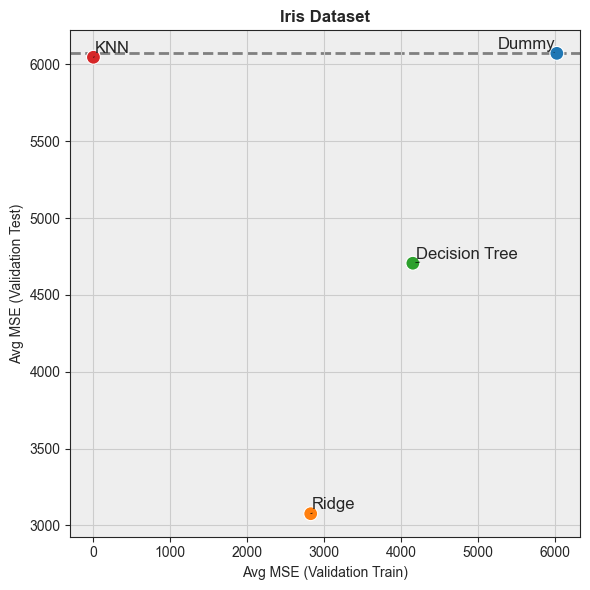

In [15]:
hh.plot_batch_results(df_results, metric_name="MSE", title="Iris Dataset", display=False)

## Optimization of hyperparameters with custom parameter grids

For this example, we will use four simple classifier models with grids of hyperparameters. 

These grid will contain all the paramaters that the gridsearch optimization will use.

In [16]:
models_to_check = [
    ('Dummy', DummyRegressor(), {'strategy': ['median']}),
    
    ('Ridge', Ridge(random_state=0), 
    {
        "alpha": [1e-4, 1e-3, 1e-2, 0.1, 1, 10]
    }),

    ('Decision Tree', DecisionTreeRegressor(random_state=0), 
    {
        "criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        "max_depth": [1, 2, 3, 4, 5, 6, 7]
    }),
    
    ('KNN', KNeighborsRegressor(), 
    {
        "n_neighbors": [1, 3, 5, 7, 9, 11],
        "metric": ['manhattan', 'euclidean']
    })
]

We can now proceed passing these models to the ```HundredHammersRegressor``` class.

In [17]:
hh_models = hh.HundredHammersRegressor(models=models_to_check, show_progress_bar=True)

Since we want to optimize the hyperparameters of our models, we set the appropriate parameter to ```True```. 

We don't need to set the ```n_grid_points``` parameter since we have already chosen which parameters to take in the GridSearch step.

In [18]:
df_results = hh_models.evaluate(X, y, optim_hyper=True)

Output()

Output()

In [19]:
df_results

,Model,Avg R2 (Validation Train),Std R2 (Validation Train),Avg R2 (Validation Test),Std R2 (Validation Test),Avg R2 (Train),Std R2 (Train),Avg R2 (Test),Std R2 (Test),Avg MSE (Validation Train),...,Avg MSE (Test),Std MSE (Test),Avg MAE (Validation Train),Std MAE (Validation Train),Avg MAE (Validation Test),Std MAE (Validation Test),Avg MAE (Train),Std MAE (Train),Avg MAE (Test),Std MAE (Test)
0,Dummy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6191.786919,...,5699.860674,465.699478,65.760775,1.301326,66.204519,4.687216,65.805666,0.633209,62.130337,2.505957
1,Ridge,0.113248,0.071706,0.004736,0.244950,0.101688,0.053241,-0.020527,0.202100,2825.164101,...,2970.761723,277.615696,43.151930,1.057776,45.037143,3.564586,43.360311,0.521265,43.294316,2.168794
2,Decision Tree,-1.222772,0.240245,-1.555766,0.421166,-1.302350,0.173142,-1.521189,0.227153,4144.189772,...,4557.082754,316.219390,53.410116,1.431197,56.754026,4.506295,53.891010,0.843554,54.445854,2.299286
3,KNN,1.000000,0.000000,-0.039302,0.200278,1.000000,0.000000,-0.042880,0.182839,0.000000,...,6165.834831,783.243107,0.000000,0.000000,58.972527,5.333243,0.000000,0.000000,59.266292,3.179486


Now that we have optimized the hyperparameters of the models, we can check which hyperparameters were chosen for each. This is done by checking the ```best_params``` attribute.

In [20]:
hh_models.best_params

[('Dummy', {'strategy': 'median'}),
 ('Ridge', {'alpha': 0.0001}),
 ('Decision Tree', {'criterion': 'squared_error', 'max_depth': 1}),
 ('KNN', {'metric': 'manhattan', 'n_neighbors': 1})]

We can also show the plots like last time.

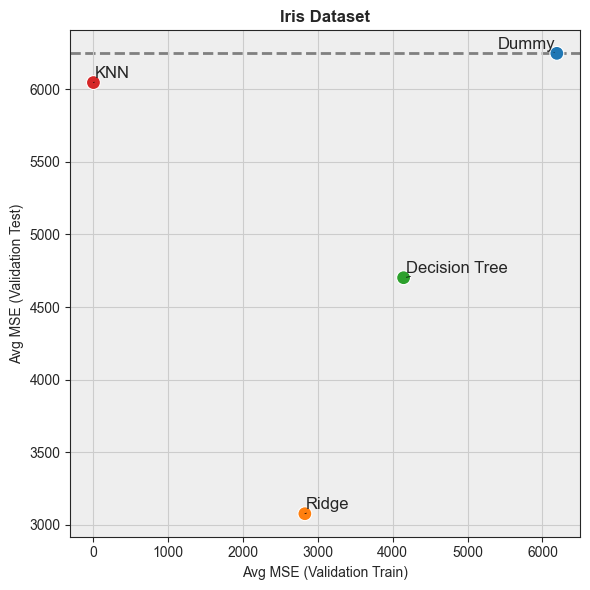

In [21]:
hh.plot_batch_results(df_results, metric_name="MSE", title="Iris Dataset", display=False)